In [23]:
from clases.red_rddas_model import RedRddasModel

# PROGRAM TO FIND STABILITY AND SYNCHRONISE IN RDDA
# Receiving the parameters
n_of_rddas = 3
n_of_variables_rdda = 5
n_of_signals_rdda = 2
n_exit_variables = 2
n_clauses_function = 2
type_network = "ALEATORY"
# this name has to be unique
unique_path = "17_05_2022"
path = "files/" + unique_path + "_" + str(n_of_rddas) + "_" + str(n_of_variables_rdda) + "_" + str(n_of_signals_rdda) \
       + "_" + str(n_exit_variables) + "_" + str(n_clauses_function)

# generate the RDDAs of the Network of RDDAs
print("generating the Network of RDDAs ...")
oRedRddasModel = RedRddasModel(n_of_rddas, n_of_variables_rdda, n_of_signals_rdda, n_exit_variables,
                               n_clauses_function)

# generate the RDDAs
print("generating the rddas ...")
oRedRddasModel.generate_rddas(type_network=type_network)

generating the Network of RDDAs ...
generating the rddas ...
RDDA :  1
VARIABLES :  [1, 2, 3, 4, 5]
RDDA :  2
VARIABLES :  [6, 7, 8, 9, 10]
RDDA :  3
VARIABLES :  [11, 12, 13, 14, 15]
Generating the True Table
A ∨ B
{'12': 'A', '15': 'B'}
{'A': True, 'B': True}
A ∨ B
{'12': 'A', '15': 'B'}
{'A': True, 'B': False}
A ∨ B
{'12': 'A', '15': 'B'}
{'A': False, 'B': True}
A ∨ B
{'12': 'A', '15': 'B'}
{'A': False, 'B': False}
Network Input : 1
Network Output : 3
Variables : [12, 15]
Name Variable : 16
Coupling Function : 12 ∨ 15
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
Generating the True Table
A ∨ B
{'8': 'A', '7': 'B'}
{'A': True, 'B': True}
A ∨ B
{'8': 'A', '7': 'B'}
{'A': True, 'B': False}
A ∨ B
{'8': 'A', '7': 'B'}
{'A': False, 'B': True}
A ∨ B
{'8': 'A', '7': 'B'}
{'A': False, 'B': False}
Network Input : 1
Network Output : 2
Variables : [8, 7]
Name Variable : 17
Coupling Function : 8 ∨ 7
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
Generating the True Table


In [24]:
import ray
# Calculate the Attractors by RDDA and by Signal
result = RedRddasModel.find_attractors_rddas.remote(oRedRddasModel)
oRedRddasModel = ray.get(result)

(find_attractors_rddas pid=19335) BEGIN CALCULATE ALL LOCAL ATTRACTORS BY PERMUTATION
(findLocalAtractorsSATSatispy pid=19334) RED NUMBER : 1 PERMUTATION SIGNAL COUPLING: 00
(findLocalAtractorsSATSatispy pid=19334) The expression cannot be satisfied
(findLocalAtractorsSATSatispy pid=19334) RED NUMBER : 1 PERMUTATION SIGNAL COUPLING: 01
(findLocalAtractorsSATSatispy pid=19334) The expression cannot be satisfied
(findLocalAtractorsSATSatispy pid=19334) RED NUMBER : 1 PERMUTATION SIGNAL COUPLING: 10
(findLocalAtractorsSATSatispy pid=19334) The expression cannot be satisfied
(findLocalAtractorsSATSatispy pid=19334) RED NUMBER : 1 PERMUTATION SIGNAL COUPLING: 11
(findLocalAtractorsSATSatispy pid=19334) The expression cannot be satisfied
(findLocalAtractorsSATSatispy pid=19334) RED NUMBER : 2 PERMUTATION SIGNAL COUPLING: 00
(findLocalAtractorsSATSatispy pid=19334) The expression cannot be satisfied
(findLocalAtractorsSATSatispy pid=19334) RED NUMBER : 2 PERMUTATION SIGNAL COUPLING: 01
(findL

In [25]:
# Save the Network of RDDAs in a Pickle file
RedRddasModel.save_file_pickle(oRedRddasModel, path)
path += ".pickle"

print("=======================================================")
print("The Network of RDDAs is saved in: ", path)

file : files/03_03_2022_3_5_2_2_2.pickle saved
The Network of RDDAs is saved in:  files/03_03_2022_3_5_2_2_2.pickle


In [26]:
# Load the Network of RDDAs in a Pickle file
oRedRddasModel = RedRddasModel.load_file_pickle(path)

# Show the Network of RDDAs
oRedRddasModel.show()

print("END SCRIPT")

NETWORK RDDA DESCRIPTION
Number of RDDs : 3
Number of variables by RDD : 5
Number of coupling signals by RDD : 2
Maximum number of exit variables by signal : 3
Maximum number of clauses by function : 3
RDDA DESCRIPTION
Name of RDDA : 1
List of intern variables : 
[1, 2, 3, 4, 5]
List of coupling signals : 
---------------
Network Input : 1
Network Output : 3
Variables : [12, 15]
Name Variable : 16
Coupling Function : 12 ∨ 15
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
---------------
---------------
Network Input : 1
Network Output : 2
Variables : [8, 7]
Name Variable : 17
Coupling Function : 8 ∨ 7
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
---------------
Description of Variables
V: 1 CNF :[[2]]
V: 2 CNF :[[4, 17], [17, 16]]
V: 3 CNF :[[2, 3]]
V: 4 CNF :[[4, 17, 5], [3, 5, 4]]
V: 5 CNF :[[16, 2, 5], [1, 16, 4]]
RDDA DESCRIPTION
Name of RDDA : 2
List of intern variables : 
[6, 7, 8, 9, 10]
List of coupling signals : 
---------------
Network Input : 2
Networ

In [27]:
# calculate the Attractors Field
# find attractor by rdda, calculate the compatibility between attractors and labeled graph montage
# oRedRddasModel = RedRddasModel.calculate_attractors_fields(oRedRddasModel)

# import ray
# # Calculate the Attractors by RDDA and by Signal
result = RedRddasModel.calculate_attractors_fields.remote(oRedRddasModel)
oRedRddasModel = ray.get(result)

(calculate_attractors_fields pid=19335) ATTRACTORS GROUP BY RDDA AND PERMUTATION
(calculate_attractors_fields pid=19335) RDDA: 1  - Signal: 00
(calculate_attractors_fields pid=19335) A_1_1: [['0', '0', '1', '1', '0', '0', '0']]
(calculate_attractors_fields pid=19335) A_1_2: [['0', '0', '0', '1', '0', '0', '0']]
(calculate_attractors_fields pid=19335) A_1_3: [['0', '0', '1', '0', '0', '0', '0']]
(calculate_attractors_fields pid=19335) A_1_4: [['0', '0', '0', '0', '0', '0', '0']]
(calculate_attractors_fields pid=19335) A_1_5: [['0', '0', '0', '1', '1', '0', '0']]
(calculate_attractors_fields pid=19335) A_1_6: [['0', '0', '1', '1', '1', '0', '0']]
(calculate_attractors_fields pid=19335) RDDA: 1  - Signal: 01
(calculate_attractors_fields pid=19335) A_1_1: [['1', '1', '1', '1', '1', '0', '1']]
(calculate_attractors_fields pid=19335) RDDA: 1  - Signal: 10
(calculate_attractors_fields pid=19335) A_1_1: [['1', '1', '1', '1', '1', '1', '0']]
(calculate_attractors_fields pid=19335) RDDA: 1  - Si

Topology Graph of the RDDA using igraph Library
Show the Topology Graph of the RDDA
(calculate_attractors_fields pid=19335) ([8, 20], [8, 14], [14, 8], [14, 20], [20, 8])
(calculate_attractors_fields pid=19335) Number of valid Attractor Fields: 4
(calculate_attractors_fields pid=19335) END CALCULATE ATTRACTORS FIELDS
(calculate_attractors_fields pid=19335) ######################################################


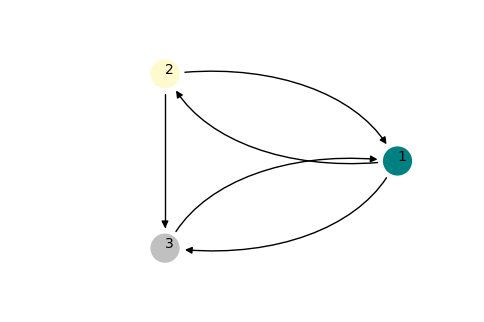

In [28]:
# generate the diagram of the Network RDDA, show and save graph in .eps format
# Show the topology graph using the igraph library
print("Topology Graph of the RDDA using igraph Library")
oRedRddasModel.graph_topology_igraph(show_graph=True,save_graph=True,path_graph="")

In [29]:
# Show the topology graph using the Networkx library
# print("Topology Graph of the RDDA using Networkx Library")
# oRedRddasModel.graph_topology_networkx(show_graph = True ,save_graph=False,path_graph="")

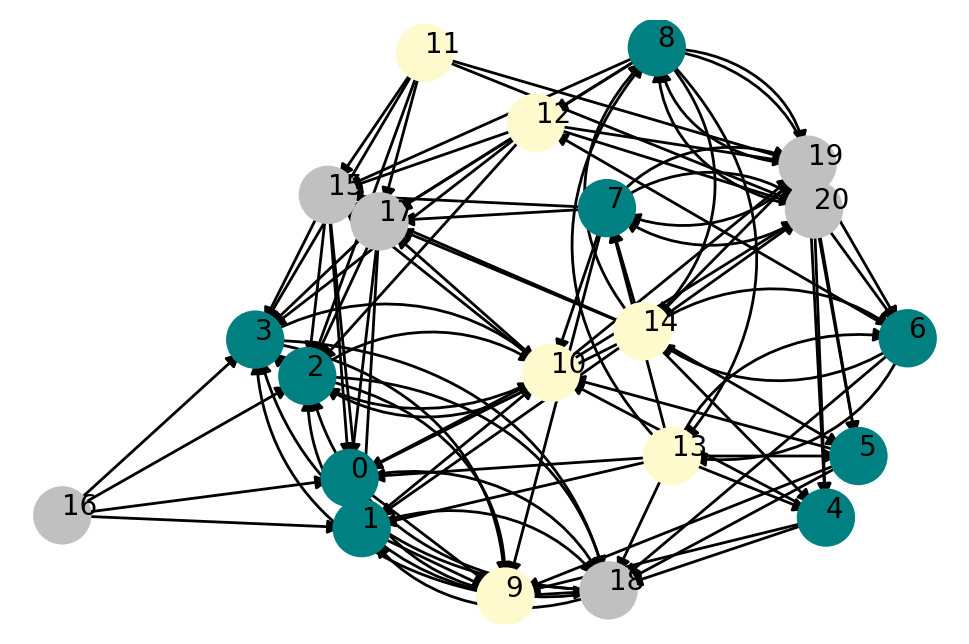

In [30]:
# Show the Graph of the attractor pairs
oRedRddasModel.graph_attractor_pairs(export_graph=True,path=path)

# import igraph as ig
# import matplotlib.pyplot as plt  # library to make draws
# path_graph = ""

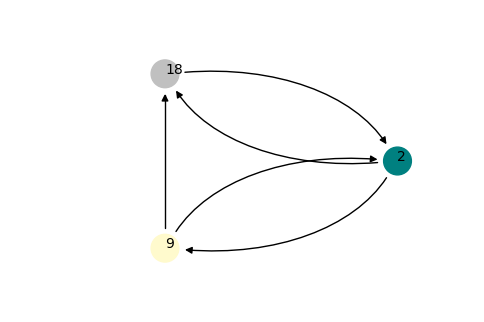

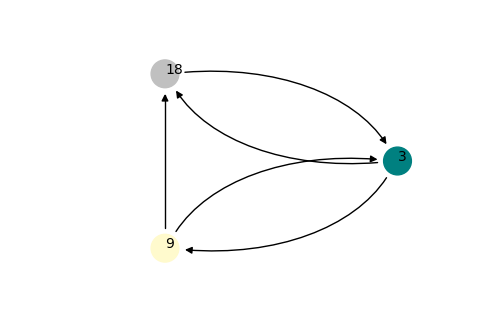

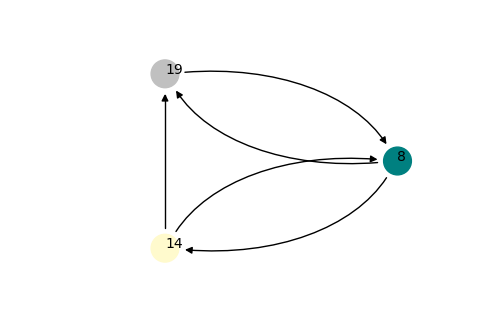

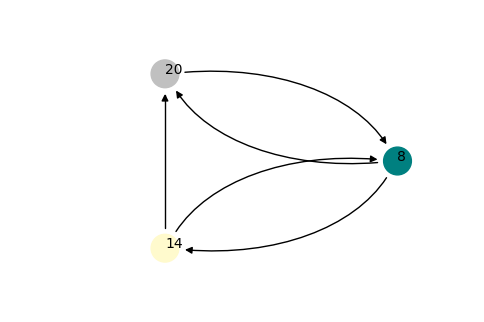

In [31]:
# Show the Graphs of the attractor fields
# import igraph as ig #
# import matplotlib.pyplot as plt  # library to make draws
oRedRddasModel.graph_attractor_fields()

In [32]:
# Show the detail for each attractor field
v_count_fields = 1
for attractor_field in oRedRddasModel.attractor_fields:
    print("Attractor Field",v_count_fields)
    unique_attactors = []
    for element in attractor_field:
        if (element[0] not in unique_attactors):
            unique_attactors.append(element[0])
        if (element[1] not in unique_attactors):
            unique_attactors.append(element[1])
    v_count_fields = v_count_fields + 1
    for attractor_index in unique_attactors:
        print( "Index:", attractor_index, "- RDD:" , oRedRddasModel.d_global_rdda_attractor[attractor_index][0], "- Attractor:", oRedRddasModel.d_global_rdda_attractor[attractor_index][1] )

Attractor Field 1
Index: 2 - RDD: 1 - Attractor: [['0', '0', '1', '0', '0', '0', '0']]
Index: 18 - RDD: 3 - Attractor: [['0', '0', '0', '0', '0', '0']]
Index: 9 - RDD: 2 - Attractor: [['0', '0', '0', '0', '0', '0', '0']]
Attractor Field 2
Index: 3 - RDD: 1 - Attractor: [['0', '0', '0', '0', '0', '0', '0']]
Index: 18 - RDD: 3 - Attractor: [['0', '0', '0', '0', '0', '0']]
Index: 9 - RDD: 2 - Attractor: [['0', '0', '0', '0', '0', '0', '0']]
Attractor Field 3
Index: 8 - RDD: 1 - Attractor: [['1', '1', '1', '1', '1', '1', '1']]
Index: 19 - RDD: 3 - Attractor: [['1', '1', '1', '1', '1', '1']]
Index: 14 - RDD: 2 - Attractor: [['1', '1', '1', '1', '1', '1', '1']]
Attractor Field 4
Index: 8 - RDD: 1 - Attractor: [['1', '1', '1', '1', '1', '1', '1']]
Index: 20 - RDD: 3 - Attractor: [['0', '0', '0', '1', '1', '1']]
Index: 14 - RDD: 2 - Attractor: [['1', '1', '1', '1', '1', '1', '1']]
